# Naive Bayes 

Objective is to use the tennis data set and:

    1) Provide a model based on Gaussian Naive bayes and calculate the accuracy.
    2) Find the prediction for the following scenarios: is the prediction for the following cases?
        Case1=     ["Rain","Mild","Strong","Weak"]
        Case2=     ["Overcast","Mild","Normal","Strong"]
        Case3=     ["Sunny","Hot","High","Weak"]

## Pseudo Code
    1) Data Analysis/Understanding of the data
    2) Encoding the categorical variables
    3) Use Gaussian Naive Bayes algorithm to predict the output variable 'Plays Tennis'
    4) Find the prediction for the 3 cases

In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# 1) Data Preparation, Analysis & Cleaning

In [2]:
features = ["Outlook", "Temperature", "Humidity", "Wind"]
target = "Play Tennis"

In [3]:
tennis_df = pd.read_csv('Tennis.csv')
tennis_df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [4]:
tennis_df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [5]:
tennis_df.Outlook.value_counts()

Sunny       5
Rain        5
Overcast    4
Name: Outlook, dtype: int64

In [6]:
tennis_df.Temperature.value_counts()

Mild    6
Cool    4
Hot     4
Name: Temperature, dtype: int64

In [7]:
tennis_df.Humidity.value_counts()

High      7
Normal    7
Name: Humidity, dtype: int64

In [8]:
tennis_df.Wind.value_counts()

Weak      8
Strong    6
Name: Wind, dtype: int64

In [9]:
tennis_df['Play Tennis'].value_counts()

Yes    9
No     5
Name: Play Tennis, dtype: int64

Tennis data has the 5  features with different values as below for 14 entries that determine whether tennis can be played or not:   
  - Outlook - Rain, Sunny, Overcast
  - Temperature - Mild, Hot, Cool 
  - Humidity - High, Normal
  - Wind - Weak, Strong
  - Play Tennis - Yes or No

In [10]:
tennis_df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play Tennis    0
dtype: int64

There are no null values in the data and hence no cleaning is required.

# 2) Encoding categorical variables
Before we apply the Naive Bayes model, we need to convert all the string to numeric. 

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
tennis_df['outlook_le'] = le.fit_transform(tennis_df.Outlook)
tennis_df['temp_le'] = le.fit_transform(tennis_df.Temperature)
tennis_df['humidity_le'] = le.fit_transform(tennis_df.Humidity)
tennis_df['wind_le'] = le.fit_transform(tennis_df.Wind)
tennis_df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis,outlook_le,temp_le,humidity_le,wind_le
0,Sunny,Hot,High,Weak,No,2,1,0,1
1,Sunny,Hot,High,Strong,No,2,1,0,0
2,Overcast,Hot,High,Weak,Yes,0,1,0,1
3,Rain,Mild,High,Weak,Yes,1,2,0,1
4,Rain,Cool,Normal,Weak,Yes,1,0,1,1


### Encoding results
    Outlook:  
        Overcast - 0, Rain - 1, Sunny - 2  
    Temperature:  
        Cool - 0, Hot - 1, Mild - 2  
    Humidity:  
        High - 0, Normal - 1  
    Wind:  
        Strong - 0, Weak - 1  

In [14]:
tennis_df.drop(['Outlook', 'Temperature', 'Humidity', 'Wind'], axis=1, inplace=True)
tennis_df.head()

,Play Tennis,outlook_le,temp_le,humidity_le,wind_le
0,No,2,1,0,1
1,No,2,1,0,0
2,Yes,0,1,0,1
3,Yes,1,2,0,1
4,Yes,1,0,1,1


# 3) Gaussian Naive Bayes model

    This is a Supervised classification problem.
        Split the train and test datasets 70-30
        Predict the test and calculate the accuracy

In [15]:
# Import the required libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle

In [16]:
#X, y = shuffle(tennis_df.drop(['Play Tennis'], axis=1), tennis_df['Play Tennis'], random_state=1)
X = tennis_df.drop(['Play Tennis'], axis=1)
y = tennis_df['Play Tennis']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(9, 4) (9,) (5, 4) (5,)


Gaussian Score: 
 88.89
Gaussian Test Score: 
 60.0
Accuracy: 
 0.6
[[1 0]
 [2 2]]
             precision    recall  f1-score   support

         No       0.33      1.00      0.50         1
        Yes       1.00      0.50      0.67         4

avg / total       0.87      0.60      0.63         5



<IPython.core.display.Javascript object>


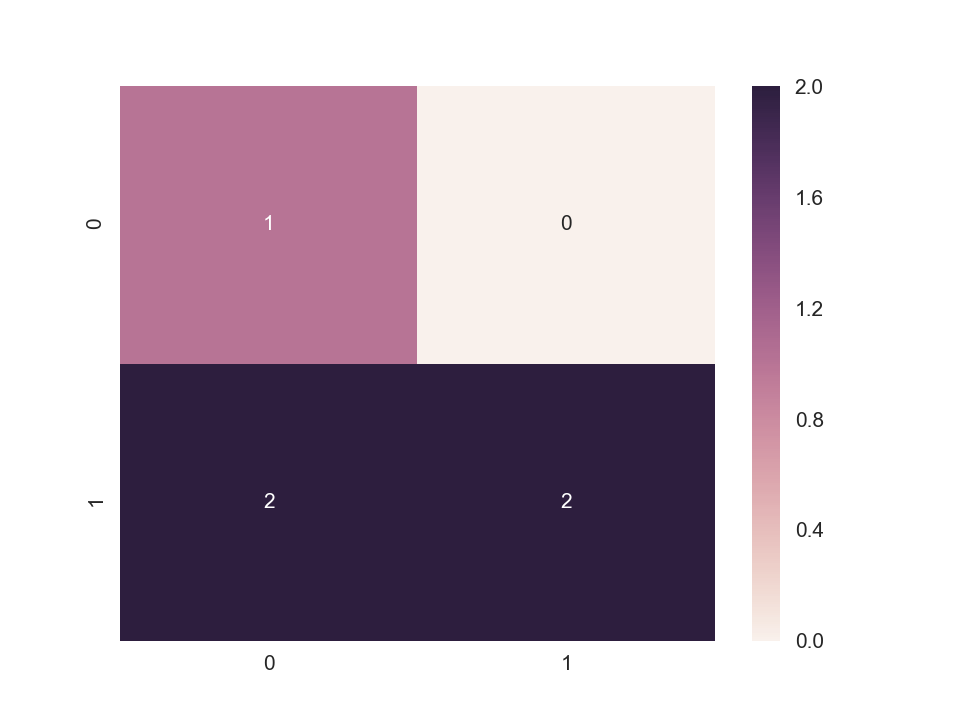

In [18]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

# 4) Prediction for the cases

Case1=     ["Rain","Mild","Strong","Weak"]  
Case2=     ["Overcast","Mild","Normal","Strong"]  
Case3=     ["Sunny","Hot","High","Weak"]  

### Encoding results
    Outlook:  
        Overcast - 0, Rain - 1, Sunny - 2  
    Temperature:  
        Cool - 0, Hot - 1, Mild - 2  
    Humidity:  
        High - 0, Normal - 1  
    Wind:  
        Strong - 0, Weak - 1  

## 4.1) Case1 = ["Rain","Mild","High","Weak"] 

In [20]:
gaussian.predict(np.asarray([[1,2,0,1]]))

array(['No'], dtype='<U3')

In [21]:
tennis_df[(tennis_df.outlook_le == 1) & (tennis_df.temp_le == 2) & (tennis_df.humidity_le == 0) & (tennis_df.wind_le == 1)]

,Play Tennis,outlook_le,temp_le,humidity_le,wind_le
3,Yes,1,2,0,1


### The prediction for case1 is wrong

## 4.2) Case2 = ["Overcast","Mild","Normal","Strong"]  

In [22]:
gaussian.predict(np.asarray([[0,2,1,0]]))

array(['Yes'], dtype='<U3')

In [23]:
tennis_df[(tennis_df.outlook_le == 0) & (tennis_df.temp_le == 2) & (tennis_df.humidity_le == 1) & (tennis_df.wind_le == 0)]

,Play Tennis,outlook_le,temp_le,humidity_le,wind_le


### There is no training data with this condition. 

## 4.3) Case3 = ["Sunny","Hot","High","Weak"] 

In [24]:
gaussian.predict(np.asarray([[2,1,0,1]]))

array(['No'], dtype='<U3')

In [25]:
tennis_df[(tennis_df.outlook_le == 2) & (tennis_df.temp_le == 1) & (tennis_df.humidity_le == 0) & (tennis_df.wind_le == 1)]

,Play Tennis,outlook_le,temp_le,humidity_le,wind_le
0,No,2,1,0,1


### The prediction for case 3 is correct

## Conclusion
     - There isnt enough data to train in a way that the predictions are correct. Some information isnt even available to make any predictions.